# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Khong**  <br/>
Firstname: **Lap Hoe**    <br/>
Student ID: **32114818**    <br/>
Email: **lkho0007@student.monash.edu**    <br/>
Your tutorial time: **Tuesday 2PM**    <br/>
***

This assignment contains **one** parts:

* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement for building your CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [1]:
%load_ext autoreload
%autoreload 2

Install the package `imutils` if you have not installed yet

In [2]:
! pip install imutils


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [4]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [5]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process the experimental data. 

In [6]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [7]:
data_manager.process_data_label()
data_manager.train_valid_test_split()

In [8]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [9]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [10]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                          

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [11]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Epoch 1/20
63/63 [==============================] - 7s 107ms/step - loss: 2.2985 - accuracy: 0.1285 - val_loss: 4.7010 - val_accuracy: 0.0960
Epoch 2/20
63/63 [==============================] - 7s 105ms/step - loss: 2.3725 - accuracy: 0.0948 - val_loss: 2.3078 - val_accuracy: 0.0760
Epoch 3/20
63/63 [==============================] - 7s 107ms/step - loss: 2.3052 - accuracy: 0.0918 - val_loss: 2.3078 - val_accuracy: 0.0760
Epoch 4/20
63/63 [==============================] - 7s 107ms/step - loss: 2.3057 - accuracy: 0.0897 - val_loss: 2.3038 - val_accuracy: 0.0980
Epoch 5/20
63/63 [==============================] - 7s 104ms/step - loss: 2.3043 - accuracy: 0.1013 - val_loss: 2.3054 - val_accuracy: 0.0980
Epoch 6/20
63/63 [==============================] - 6s 101ms/step - loss: 2.3049 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1040
Epoch 7/20
63/63 [==============================] - 7s 109ms/step - loss: 2.3046 - accuracy: 0.0990 - val_loss: 2.3063 - val_accuracy: 0.0980
Epoch 

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [12]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 13ms/step - loss: 2.3054 - accuracy: 0.0920


0.09200000017881393

Below shows how you can inspect the training progress.

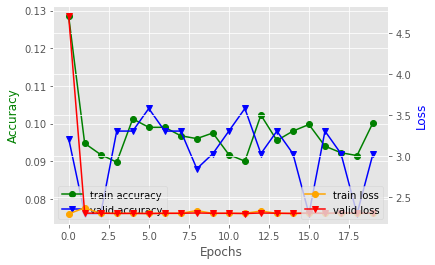

In [13]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [14]:
network1.predict(data_manager.X_test[0:10])

1/1 [==============================] - 0s 58ms/step


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

16/16 [==============================] - 0s 8ms/step


<Figure size 432x288 with 0 Axes>

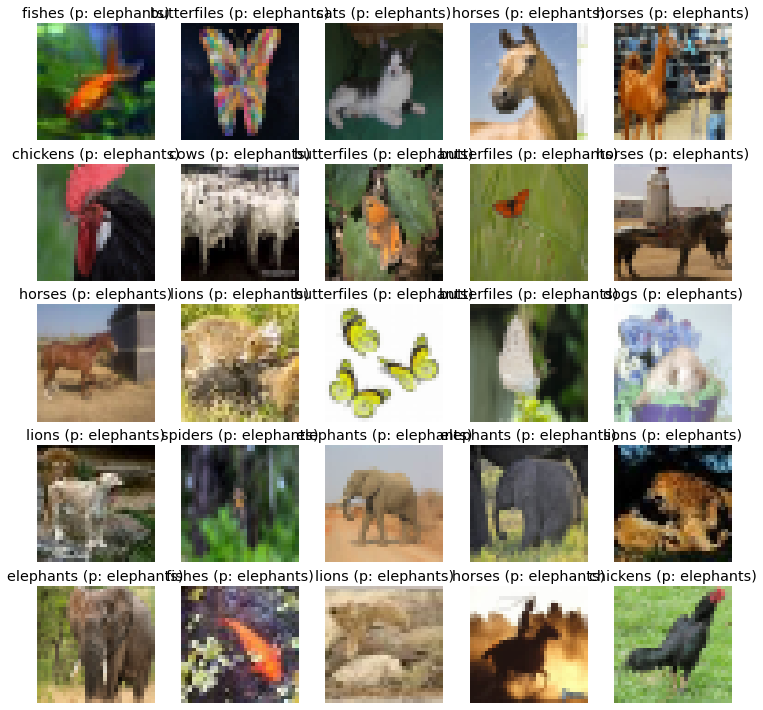

In [15]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red">**Question 3.1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

### Observation
According to my observation, the model did not learn well. We can see this through a few metrics. 
1. The training accuracy does not improve at every iteration. The accuracy is stochastic by nature, and shows no clear pattern of improvement. 
2. Validation accuracy during training is low. The model fails to generalize unseen data during training. 
3. The testing accuracy is low. The model fails to generalize unseen data during testing. 

### Reasoning of possible problems
Remember that the point of optimizers is to modify the weight values at every epoch based on the gradients of weights and biases calculated with respect to the loss function. It is known that the loss landscape for any particular neural network can be complex at times, with many local minimum, maxima and saddle points. It is most likely impossible to reach a global minima due to the vast number of paramaters needed to optimize. Below are a few reasons why this model did not train/test well. 
1. The learning rate for the particular optimizer, specifically Stochastic Gradient Descent, is too large. This random bounce of train and test accuracy as shown in the graph is an indication of overshooting. There are very drastic changes in weights at every epoch, causing a high chance of divergence of gradients instead of convergence to a local minima. 

2. The depth of the CNN is too shallow. Causing a severe underfitting problem as it cannot perform feature extraction well. The features extracted by this CNN cannot recognize any details of the input data. 

### Possible Improvements
There are several improvements that can be made to improve the model. 

1. Hyper-parameter tuning. This is arguably the most important step when developing a new untrained model from scratch. We can test out different learning rate values and optimizers to see which one performs the best. We also need to ensure that our validation accuracy does not deplete as the model trains. Hence there is a need for ` EarlyStopping`.  

2. Increase depth of CNN. This can allow different levels of features to be extracted. Low-level, medium-level up to high-level feature extraction. 

**For questions 3.2 to 3.9, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [17]:
tf.random.set_seed(1234)

<span style="color:red">**Question 3.2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below. Note that the `YourModel` class   is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [19]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)
        
    def build_block_func(self, feature_map, input_tens):
        CONV = layers.Conv2D(feature_map, (3,3), padding='same', strides=1)(input_tens)
        
        if self.batch_norm is not None:
            h = layers.BatchNormalization()(CONV)
        else:
            h = CONV
        
        h = layers.Activation(self.activation_func)(h)
        h = layers.Conv2D(feature_map, (3,3), padding='same', strides=1)(h)
        
        if self.batch_norm is not None:
            h = layers.BatchNormalization()(h)
        
        if self.use_skip:
            h = layers.Add()([h, CONV]) 
        
        h = layers.AveragePooling2D(pool_size=(2,2), padding='same')(h)
        h = layers.Dropout(rate=self.drop_rate)(h)
        
        return h
         
    
    def build_cnn(self):
        X = tf.keras.layers.Input(shape=(32,32,3))
        block_output = X
        for feature_map in self.feature_maps:
            block_output = self.build_block_func(feature_map, block_output)
        block_output = layers.Flatten()(block_output)
        block_output = layers.Dense(self.num_classes, activation="softmax")(block_output)
        
        self.model = tf.keras.Model(inputs=X, outputs=block_output)
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<span style="color:red">**Question 3.3**</span> **Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.**
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

### Report on both architechtures 
Based on a few metrics of evaluation, it is hard to say which model is better. The performance of both of the models are rather similar. 

#### Accuracy Comparison
It appears that both of the architechtures have similar accuracy on the testing set, although `no_skip` performs 2% better than `skip`, with `skip` having 0.54 acc, and `no_skip` having 0.56 acc. Judging by this metric alone, **the logical conclusion would be `no_skip` is better than `skip`**. However, both of the models have similar range and development of training accuracy.

#### Validation Comparison
Both of the validation accuracy for the models hovers around the range of `0.55 to 0.57` during the 20 epochs of training. 

#### Overfitting concerns 
Overfitting has clearly occured for both of the models with and without skip. Here we can see that the training accuracy is relatively high for both models, but with low validation accuracy. This shows that both models don't generalize well with new instances. This may also be due to how `dropout` is 0% for both of the models. 

This makes it hard to properly evaluate if `skip` is better than `no_skip`. The problem is that the architechture already overfits, hence this comparison between `skip` and `no_skip` is not meaningful.  

In [20]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_skip.build_cnn()
our_network_skip.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['batch_normalization[0][0]']

In [21]:
our_network_skip.fit(data_manager, batch_size=32, num_epochs=20)

Epoch 1/20
125/125 [==============================] - 12s 91ms/step - loss: 2.1541 - accuracy: 0.3668 - val_loss: 2.6426 - val_accuracy: 0.1600
Epoch 2/20
125/125 [==============================] - 11s 92ms/step - loss: 1.5119 - accuracy: 0.5120 - val_loss: 2.2324 - val_accuracy: 0.3060
Epoch 3/20
125/125 [==============================] - 11s 87ms/step - loss: 1.2791 - accuracy: 0.5720 - val_loss: 2.0557 - val_accuracy: 0.3360
Epoch 4/20
125/125 [==============================] - 11s 87ms/step - loss: 1.0913 - accuracy: 0.6310 - val_loss: 1.7269 - val_accuracy: 0.4420
Epoch 5/20
125/125 [==============================] - 11s 91ms/step - loss: 0.9738 - accuracy: 0.6685 - val_loss: 1.7126 - val_accuracy: 0.5160
Epoch 6/20
125/125 [==============================] - 11s 89ms/step - loss: 0.8100 - accuracy: 0.7253 - val_loss: 1.8450 - val_accuracy: 0.4940
Epoch 7/20
125/125 [==============================] - 11s 88ms/step - loss: 0.6949 - accuracy: 0.7588 - val_loss: 2.2157 - val_accuracy:

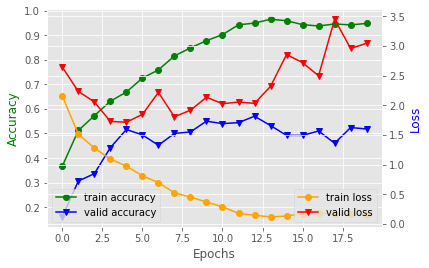

In [22]:
our_network_skip.plot_progress()

In [23]:
our_network_skip.model.evaluate(x=data_manager.X_test, y=data_manager.y_test)

16/16 [==============================] - 0s 14ms/step - loss: 3.0915 - accuracy: 0.5420


[3.091519832611084, 0.5419999957084656]

In [24]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)
our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [25]:
our_network_no_skip.fit(data_manager, batch_size=32, num_epochs=20)

Epoch 1/20
125/125 [==============================] - 11s 89ms/step - loss: 2.0537 - accuracy: 0.3620 - val_loss: 2.9020 - val_accuracy: 0.2080
Epoch 2/20
125/125 [==============================] - 11s 89ms/step - loss: 1.6311 - accuracy: 0.4638 - val_loss: 2.1053 - val_accuracy: 0.2920
Epoch 3/20
125/125 [==============================] - 11s 90ms/step - loss: 1.3611 - accuracy: 0.5445 - val_loss: 1.7679 - val_accuracy: 0.4100
Epoch 4/20
125/125 [==============================] - 11s 86ms/step - loss: 1.2097 - accuracy: 0.5845 - val_loss: 1.8299 - val_accuracy: 0.4240
Epoch 5/20
125/125 [==============================] - 11s 88ms/step - loss: 1.1087 - accuracy: 0.6305 - val_loss: 1.5872 - val_accuracy: 0.5240
Epoch 6/20
125/125 [==============================] - 11s 87ms/step - loss: 0.9443 - accuracy: 0.6823 - val_loss: 1.6616 - val_accuracy: 0.5180
Epoch 7/20
125/125 [==============================] - 11s 85ms/step - loss: 0.8308 - accuracy: 0.7203 - val_loss: 1.6052 - val_accuracy:

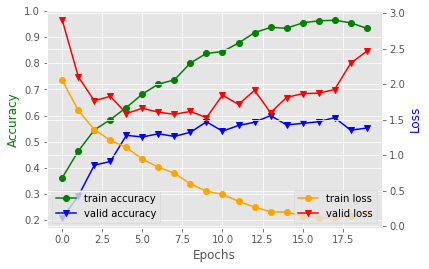

In [26]:
our_network_no_skip.plot_progress()

In [27]:
our_network_no_skip.model.evaluate(x=data_manager.X_test, y=data_manager.y_test)

16/16 [==============================] - 0s 14ms/step - loss: 2.1356 - accuracy: 0.5700


[2.1355533599853516, 0.5699999928474426]